## Problem Statement
 * A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

| Variable      | Variable Definition |
| :---        |    :----:   |
|   User_ID    |    User_ID    |
|  Product_ID  |    Product_ID    |
| Gender |   Sex of User  |
| Age |Age in Bins |
| Occupation  | Occupation (Masked) |
| City_Category | Category of the City (A,B,C) |
| Stay_In_Current_City_Years | Number of years stay in current city |
| Marital_Status | Marital Status |
| Product_Category_1 | Product Category (Masked)  |
| Product_Category_2 | Product may belongs to other category also (Masked) |
| Product_Category_3 | Product may belongs to other category also (Masked) |
| Purchase | Purchase Amount (Target Variable) |


## Importing Necessary Libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [72]:
# loading the dataset

df_train = pd.read_csv('blackFriday_train.csv')

df_test = pd.read_csv('blackFriday_test.csv')

# merging train and test dataset

df = df_train.append(df_test, sort = False)
df.shape

(783667, 12)

In [73]:
# print the first five rows

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [74]:
# basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


### Describing the basic statistics of the data

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#### Basic statistics of the object type columns

In [76]:
df_obj_col = df.dtypes[df.dtypes == 'object'].index # get the index of all the object type columns
df_obj_col

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [77]:
df[df_obj_col].describe().T

,count,unique,top,freq
Product_ID,783667,3677,P00265242,2709
Gender,783667,2,M,590031
Age,783667,7,26-35,313015
City_Category,783667,3,B,329739
Stay_In_Current_City_Years,783667,5,1,276425


### Dropping uncessary fields from the dataset

In [78]:
df.drop(['User_ID'], axis = 1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Converting categorical data into integer by using mapping function

In [79]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [80]:
# Unique values of the Age field

df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [81]:
# mapping the age variable into integer type variable

df['Age'] = df['Age'].map({'0-17':1, '18-25':2 , '26-35':3, '36-45':4 ,'46-50':5, '51-55':6, '55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [82]:
df.City_Category.unique() # unique values in the City_Category column

array(['A', 'C', 'B'], dtype=object)

### Creating dummies for the categorical data

In [83]:
city = pd.get_dummies(df['City_Category'], drop_first = True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [84]:
df.drop('City_Category', axis = 1, inplace = True)

### Concatinating dummy variables with original dataset

In [85]:
df = pd.concat([df, city], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### Checking for column wise null values

In [86]:
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

###  Unique values of fields which contains NAN values for different columns

In [87]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [88]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [89]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count of the columns containig NAN values

In [90]:
df.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [91]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [92]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

### Renaming the columns

In [93]:
df.rename(columns = {'Product_Category_1': 'Cat1', 'Product_Category_2': 'Cat2', 'Product_Category_3': 'Cat3'}, inplace = True)

In [94]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Cat1', 'Cat2', 'Cat3',
       'Purchase', 'B', 'C'],
      dtype='object')

### Filling the NAN values with the mode

In [95]:
df['Cat1'] = df['Cat1'].fillna(df['Cat1'].mode()[0])
df['Cat2'] = df['Cat2'].fillna(df['Cat2'].mode()[0])
df['Cat3'] = df['Cat3'].fillna(df['Cat3'].mode()[0])

In [96]:
# filling the NAN value with mean
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [97]:
# rechecking the null values

df.isna().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Cat1                          0
Cat2                          0
Cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [98]:
# checking the unique values of the column Stay_In_Current_City_Years

df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

### Replacing the value by using str method

In [99]:
df['Stay_In_Current_City_Years'] = df.Stay_In_Current_City_Years.str.replace('+', '')

### Datatype Conversion

In [100]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [101]:
df.dtypes # Rechecking the datatypes of the dataset

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Cat1                            int64
Cat2                          float64
Cat3                          float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

### Creating a Checkpoint

In [102]:
df_i = df.copy()

In [103]:
# dropping the unnecessary field
df_i.drop('Product_ID', axis = 1, inplace = True)

### Visualizing Age Vs Purchased

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

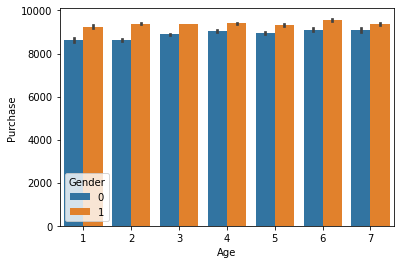

In [104]:
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df_i)

Percentage of Purchasing goods of men over women is higher

### Visualizing Product_category_1 Vs Purchased

<AxesSubplot:xlabel='Cat1', ylabel='Purchase'>

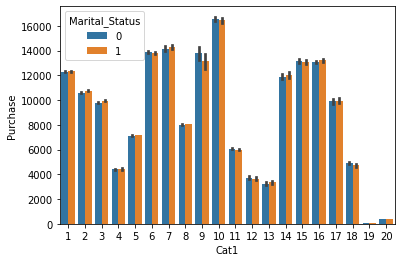

In [105]:
sns.barplot('Cat1', 'Purchase', hue = 'Marital_Status', data = df_i)

### Visualizing Product_category_1 Vs Purchased

<AxesSubplot:xlabel='Cat2', ylabel='Purchase'>

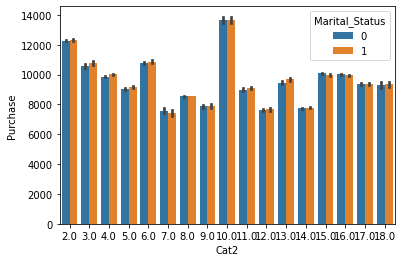

In [106]:
sns.barplot('Cat2', 'Purchase', hue = 'Marital_Status', data = df_i)

### Visualizing Product_category_1 Vs Purchased

<AxesSubplot:xlabel='Cat3', ylabel='Purchase'>

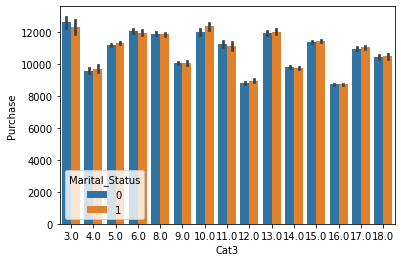

In [107]:
sns.barplot('Cat3', 'Purchase', hue = 'Marital_Status', data = df_i)

-  There is no such variation in the purchasing capacity based on the Gender. 
-  Product Category 3 is the most purchased category among all the categories.

In [108]:
X = df_i.drop('Purchase', axis = 1) # dropping the Purchase Column to create features
y = df_i.Purchase # Selecting the Purchase column to create labels

In [109]:
# Dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [110]:
# feature scaling so that data in all the columns are in the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
X_train

array([[ 0.57225139, -1.10537807, -0.62495021, ...,  0.36878309,
        -0.85257747,  1.48680718],
       [ 0.57225139,  0.37268813, -0.93166199, ...,  0.36878309,
         1.17291394, -0.67258217],
       [-1.74748376, -0.36634497,  1.36867637, ...,  0.36878309,
         1.17291394, -0.67258217],
       ...,
       [ 0.57225139, -0.36634497, -0.7783061 , ...,  0.36878309,
         1.17291394, -0.67258217],
       [ 0.57225139, -0.36634497,  1.82874404, ...,  0.36878309,
        -0.85257747, -0.67258217],
       [-1.74748376, -0.36634497,  1.82874404, ..., -2.18720927,
        -0.85257747, -0.67258217]])

In [112]:
X_test

array([[ 0.57225139,  1.11172123, -0.16488254, ...,  0.36878309,
        -0.85257747,  1.48680718],
       [ 0.57225139,  2.58978743,  1.36867637, ...,  0.36878309,
        -0.85257747,  1.48680718],
       [-1.74748376,  0.37268813, -0.93166199, ...,  0.36878309,
        -0.85257747, -0.67258217],
       ...,
       [ 0.57225139,  1.11172123, -0.16488254, ...,  0.36878309,
         1.17291394, -0.67258217],
       [ 0.57225139,  0.37268813,  0.75525281, ...,  0.00364132,
         1.17291394, -0.67258217],
       [-1.74748376, -0.36634497, -1.23837378, ...,  0.36878309,
         1.17291394, -0.67258217]])